In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
h = 1
I = np.random.normal(0, h, 2)
I

array([-1.67480463,  0.45815034])

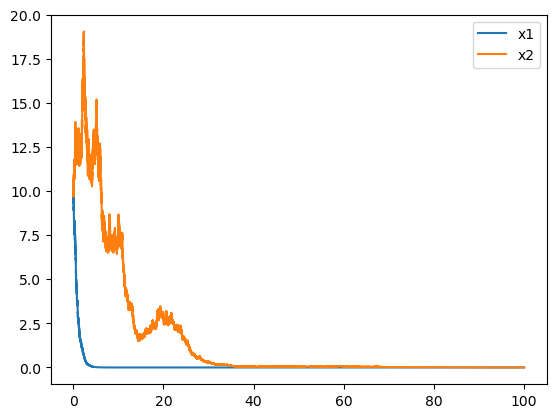

In [39]:
a1, a2, b1, b2 = 0.1, -0.1, 0.1, -0.12

def explicit_euler_calculation(x, times, h, sigma1, sigma2):
    x_current = np.array(x)
    I = np.random.normal(0, np.sqrt(h), 2)
    x_current[0] = x[0] + (b1 - a1*x[1])*x[0]*h + sigma1*x[0]*I[0]
    x_current[1] = x[1] + (b2 - a2*x[0])*x[1]*h + sigma2*x[1]*I[1]
    return x_current

def patankar_euler_calculation(x, times, h, sigma1, sigma2):
    x_current = np.array(x)
    I = np.random.normal(0, np.sqrt(h), 2)
    x_current[0] = (x[0] + b1*x[0]*h + sigma1*x[0]*I[0]) / (1 + a1*x[1]*h)
    x_current[1] = (x[1] + b2*x[1]*h + sigma2*x[1]*I[1]) / (1 + a2*x[0]*h)
    return x_current

def stochastic_patankar_euler_calculation(x, times, h, sigma1, sigma2):
    x_current = np.array(x)
    I = np.random.normal(0, np.sqrt(h), 2)
    x_current[0] = (x[0] + b1*x[0]*h) / (1 + a1*x[1]*h - sigma1*I[0] + (sigma1*I[0])**2)
    x_current[1] = (x[1] + b2*x[1]*h) / (1 + a2*x[0]*h - sigma2*I[1] + (sigma2*I[1])**2)
    return x_current

def fully_composite_euler_method(times, h, sigma1, sigma2, initial_cond):
    x = np.zeros((len(times), 2))
    x[0] = initial_cond
    x_current = initial_cond

    for i in range(1, len(times)):
        time = times[i]

        eec = explicit_euler_calculation(x_current, time, h, sigma1, sigma2)
        pec = patankar_euler_calculation(x_current, time, h, sigma1, sigma2)
        spec = stochastic_patankar_euler_calculation(x_current, time, h, sigma1, sigma2)

        # Apply composite conditions element-wise
        for j in range(2):
            if eec[j] > 0:
                x[i, j] = eec[j]
            elif pec[j] > 0:
                x[i, j] = pec[j]
            else:
                x[i, j] = spec[j]
        x_current = x[i]

    return x

h = 1/(2**12)
times = np.arange(0, 100, h)
x = fully_composite_euler_method(times, h , 0.2, 0.2, [10,10])

plt.plot(times, x[:, 0], label = 'x1')
plt.plot(times, x[:, 1], label = 'x2')
plt.legend()
plt.show()


In [42]:
import numpy as np

def simulate_system(h, sigma1, sigma2, n, initial_cond, total_time):
    # Assuming a regular time grid for simplicity
    times = np.arange(0, total_time, h)
    negative_step_count = 0
    negative_simulation_count = 0
    
    for simulation in range(n):
        x = fully_composite_euler_method(times, h, sigma1, sigma2, initial_cond)
        # Check for negative values in any simulation
        negative_steps = np.any(x < 0, axis=1)
        negative_step_count += np.sum(negative_steps)
        if np.any(negative_steps):
            negative_simulation_count += 1
    
    average_negative_steps_per_simulation = negative_step_count / n
    return average_negative_steps_per_simulation, negative_simulation_count

# Definitions of the other functions remain unchanged

# Example usage:
h = 1/(2**6)
sigma1 = 0.2
sigma2 = 0.2
n = 100  # Number of simulations
initial_cond = np.array([6, 6])  # Example initial conditions
total_time = 100  # Total time for simulation

average_steps, num_negative_sims = simulate_system(h, sigma1, sigma2, n, initial_cond, total_time)
print(f"Average Negative Steps per Simulation: {average_steps}")
print(f"Number of Simulations with Negative Values: {num_negative_sims}")


Average Negative Steps per Simulation: 0.0
Number of Simulations with Negative Values: 0


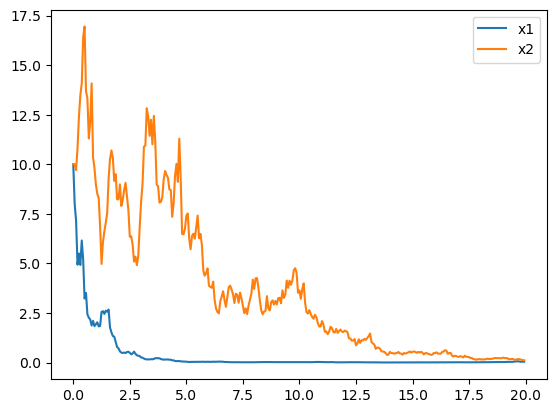

In [54]:
h = 1/(2**4)
times = np.arange(0, 20, h)
x = fully_composite_euler_method(times, h , 0.5, 0.5, [10,10])

plt.plot(times, x[:, 0], label = 'x1')
plt.plot(times, x[:, 1], label = 'x2')
plt.legend()
plt.show()

In [56]:
x[:,0]

array([1.00000000e+01, 8.00000000e+00, 7.14919033e+00, 4.93726713e+00,
       5.50113478e+00, 4.92265755e+00, 6.15665787e+00, 5.20019361e+00,
       3.22976621e+00, 3.51213237e+00, 2.43503657e+00, 2.26698704e+00,
       2.17432987e+00, 1.86771810e+00, 2.10262005e+00, 1.83799121e+00,
       1.93887665e+00, 2.03212480e+00, 1.82557653e+00, 1.85137542e+00,
       2.55589967e+00, 2.59168112e+00, 2.45388990e+00, 2.61926809e+00,
       2.56587505e+00, 2.67266351e+00, 1.76672876e+00, 1.52582681e+00,
       1.33758911e+00, 1.30885975e+00, 1.04296889e+00, 7.84119645e-01,
       7.16757027e-01, 5.66593457e-01, 5.02315671e-01, 4.85561919e-01,
       5.04542120e-01, 4.78614654e-01, 5.33055262e-01, 5.45478469e-01,
       4.91863221e-01, 4.16375458e-01, 4.59953549e-01, 5.51037769e-01,
       4.43859346e-01, 3.66490325e-01, 3.50037189e-01, 3.24082288e-01,
       2.59648634e-01, 2.43546860e-01, 2.08780672e-01, 1.68057012e-01,
       1.61875159e-01, 1.61422971e-01, 1.60020380e-01, 1.71978222e-01,
      